In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

import sys
import os
sys.path.append('../')

In [1]:
def generate_predictions(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

In [5]:
def plot_confusion_matrix(true_labels, predicted_labels, label_mapping):
    # Generate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Convert the confusion matrix to a dataframe for easier plotting with seaborn
    labels = [v for k, v in sorted(label_mapping.items(), key=lambda item: item[1])]
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Train: 911 Val: 911
Unique classes in dataset: [2 5 1 4 3]
Number of classes: 5


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:652: UserWarning: Metadata Warning, tag 296 had too many entries: 2, expected 1
  warnings.warn(


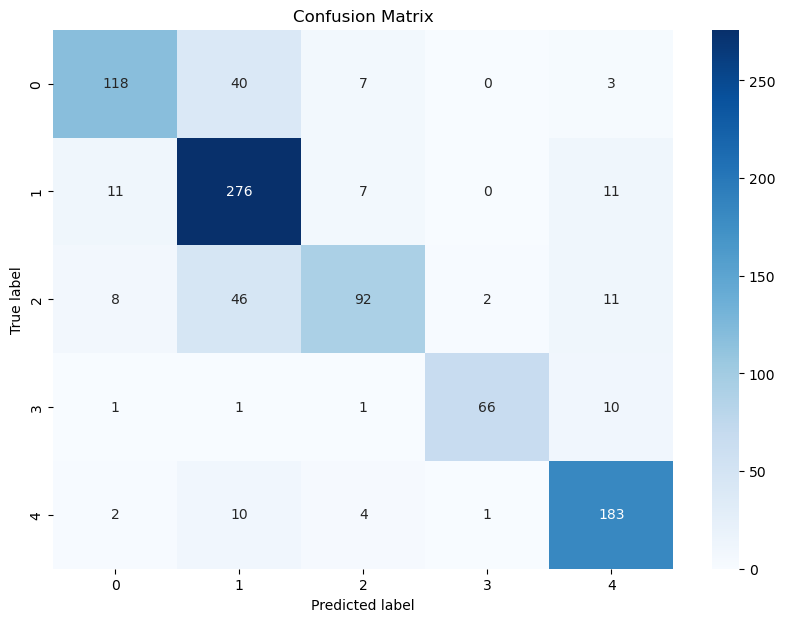

In [4]:
from model import SimpleModel
from dataset import ArtportalenDataModule

label_mapping = {0: '1K', 1: '2K', 2: '3K', 3: '4K', 4: '5K_plus'}


data = ArtportalenDataModule(data_dir='/Users/amee/Library/CloudStorage/GoogleDrive-ameeassad@gmail.com/My Drive/artportalen_goeag', batch_size=1, size=224)
data.setup_from_coco('annot/modified_val_annotations.json', 'annot/modified_val_annotations.json')
dataloader = data.val_dataloader()

checkpoint = "checkpoints/model-j75sihxi-best-epoch049/model.ckpt"


model = SimpleModel(model_name="resnet152", pretrained=False, num_classes=5, outdir="notebook_output")
checkpoint = torch.load(checkpoint, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["state_dict"])


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming `test_dataloader` is your test data loader
true_labels, predicted_labels = generate_predictions(model, dataloader, device)

# Plot confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, label_mapping)
